<a href="https://colab.research.google.com/github/tunaozr/proje_prototip1/blob/main/car_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import os  # For interacting with the operating system (e.g., file paths)
import pandas as pd  # For loading and manipulating CSV data (bounding boxes and image info)
import numpy as np  # For numerical operations and array handling
import cv2  # For image processing and manipulation (OpenCV library)
import matplotlib.pyplot as plt  # For visualizing data and images (plots)
import seaborn as sns  # For advanced data visualization (especially histograms and distributions)
from glob import glob  # For finding all image files in a directory (using wildcard patterns)
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from PIL import Image
from ultralytics import YOLO


import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!mkdir -p "/kaggle/working/data"
!mkdir -p "/kaggle/working/data/images"
!mkdir -p "/kaggle/working/data/images/train"
!mkdir -p "/kaggle/working/data/images/val"
!mkdir -p "/kaggle/working/data/labels"
!mkdir -p "/kaggle/working/data/labels/train"
!mkdir -p "/kaggle/working/data/labels/val"

root_dir = "/kaggle/working/data"
labels_dir = "/kaggle/working/data/labels"
images_dir = "/kaggle/working/data/images"

In [ ]:
train_data = "/content/drive/MyDrive/datasetler/car/training_images"
csv_data = "/content/drive/MyDrive/datasetler/car/train_solution_bounding_boxes (1).csv"
test_data = "/content/drive/MyDrive/datasetler/car/testing_images"

In [ ]:
# Loading the CSV data
df = pd.read_csv(csv_data)

# Display the first few rows of the dataframe to understand its structure
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   559 non-null    object 
 1   xmin    559 non-null    float64
 2   ymin    559 non-null    float64
 3   xmax    559 non-null    float64
 4   ymax    559 non-null    float64
dtypes: float64(4), object(1)
memory usage: 22.0+ KB
None


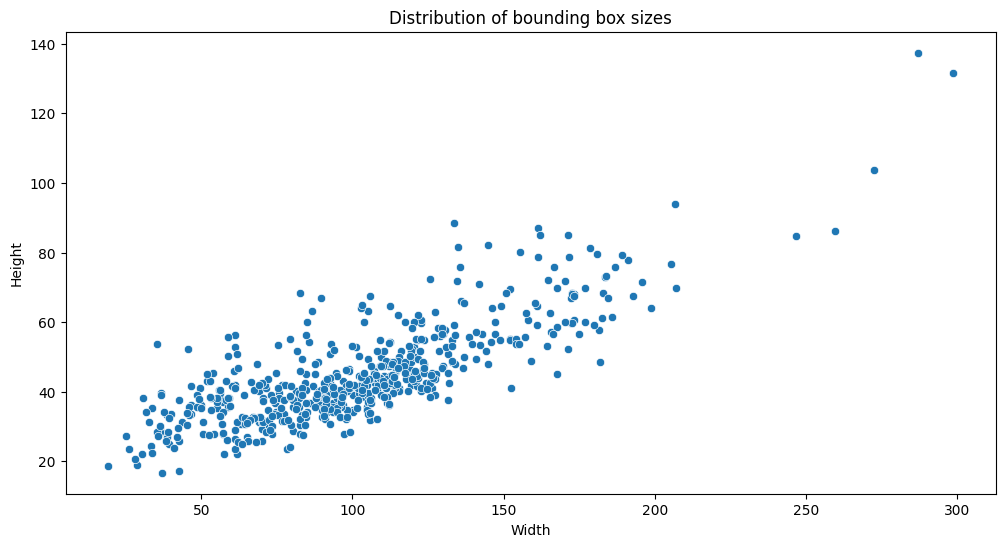

In [ ]:
plt.figure(figsize=(12, 6))
df['width'] = df['xmax'] - df['xmin']
df['height'] = df['ymax'] - df['ymin']
sns.scatterplot(x='width', y='height', data=df)
plt.title('Distribution of bounding box sizes')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

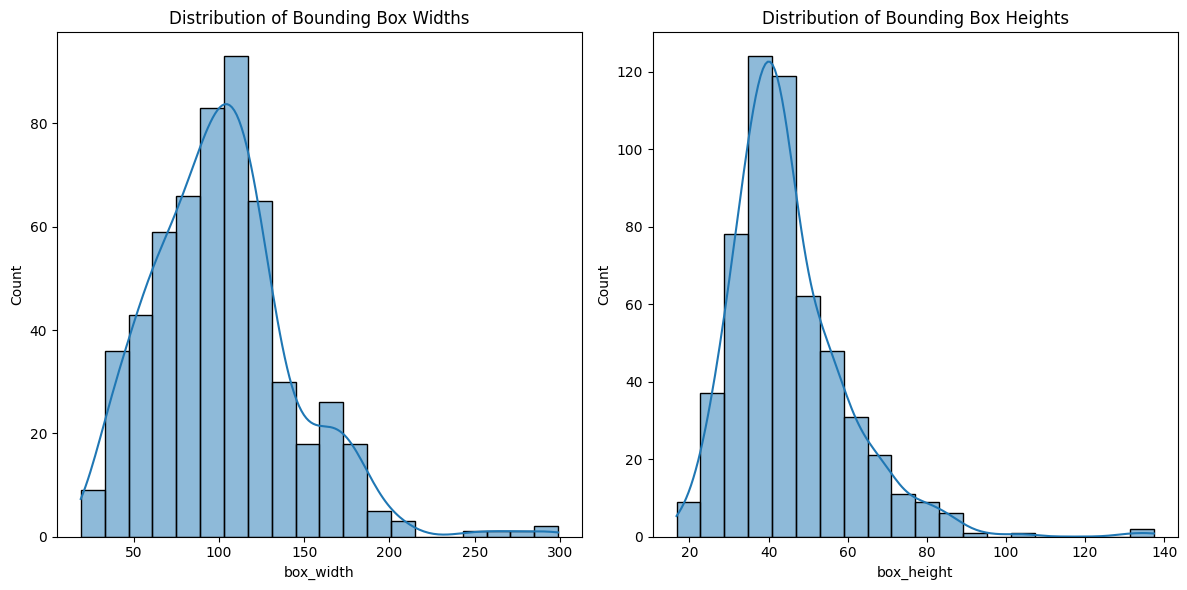

In [ ]:
df['box_width'] = df['xmax'] - df['xmin']
df['box_height'] = df['ymax'] - df['ymin']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['box_width'], bins=20, kde=True)
plt.title('Distribution of Bounding Box Widths')

plt.subplot(1, 2, 2)
sns.histplot(df['box_height'], bins=20, kde=True)
plt.title('Distribution of Bounding Box Heights')

plt.tight_layout();
plt.show();

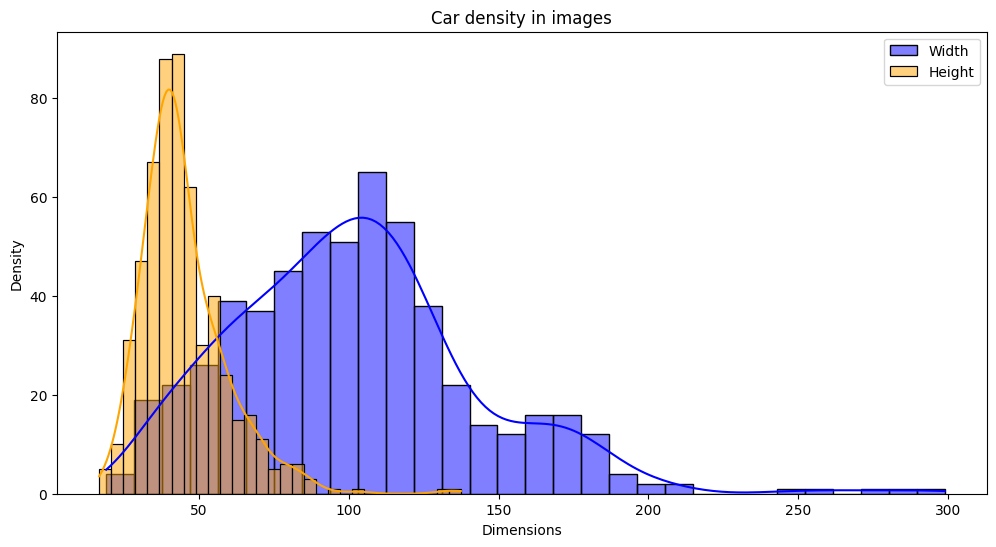

In [ ]:
# Car density analysis in images
plt.figure(figsize=(12, 6))
sns.histplot(df['width'], bins=30, kde=True, color='blue', label='Width')
sns.histplot(df['height'], bins=30, kde=True, color='orange', label='Height')
plt.title('Car density in images')
plt.xlabel('Dimensions')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Visualizing sample images with bounding boxes
def plot_images_with_boxes(image_path, df, n=5):
    images = glob(f'{image_path}/*.jpg')[:n]
    for img_path in images:
        img = cv2.imread(img_path)
        img_name = os.path.basename(img_path)
        boxes = df[df['image'] == img_name]  # تغيير 'filename' إلى 'image'

        for _, box in boxes.iterrows():
            cv2.rectangle(img,
                          (int(box['xmin']), int(box['ymin'])),
                          (int(box['xmax']), int(box['ymax'])),
                          (0, 255, 0), 2)

        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(img_name)
        plt.axis('off')
        plt.show()

In [ ]:
# Plotting sample images with bounding boxes
plot_images_with_boxes(train_data, df)


In [ ]:
# Prepare YOLO format annotations
def create_yolo_annotation(row, img_width, img_height):
    x_center = ((row['xmin'] + row['xmax']) / 2) / img_width
    y_center = ((row['ymin'] + row['ymax']) / 2) / img_height
    width = (row['xmax'] - row['xmin']) / img_width
    height = (row['ymax'] - row['ymin']) / img_height
    return f"0 {x_center} {y_center} {width} {height}"


In [ ]:
# Create YOLO annotations and copy images
for img_name in df['image'].unique():
    img_df = df[df['image'] == img_name]
    img_path = os.path.join(train_data, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img_height, img_width = img.shape[:2]

        # Decide whether to put in train or val folder
        if np.random.rand() < 0.8:  # 80% train, 20% val
            subset = "train"
        else:
            subset = "val"

        # Copy image
        dst_img_path = os.path.join(images_dir, subset, img_name)
        cv2.imwrite(dst_img_path, img)

        # Create annotation file
        annotation_path = os.path.join(labels_dir, subset, f"{img_name.split('.')[0]}.txt")
        with open(annotation_path, 'w') as f:
            for _, row in img_df.iterrows():
                yolo_annotation = create_yolo_annotation(row, img_width, img_height)
                f.write(yolo_annotation + '\n')

In [ ]:
# Create YAML configuration file
yaml_content = f"""
path: {root_dir}
train: images/train
val: images/val

nc: 1
names: ['car']
"""

with open('car_detection.yaml', 'w') as f:
    f.write(yaml_content)

print("YAML configuration file created.")

YAML configuration file created.


In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
# Disable W&B logging to avoid the API key prompt
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
results = model.train(
    data='car_detection.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='car_detection_model'
)

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=car_detection.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=car_detection_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/data/labels/train... 283 images, 0 backgrounds, 0 corrupt: 100%|██████████| 283/283 [00:00<00:00, 1904.45it/s]

train: New cache created: /kaggle/working/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/data/labels/val... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 2224.34it/s]

val: New cache created: /kaggle/working/data/labels/val.cache
Plotting labels to runs/detect/car_detection_model/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/car_detection_model
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.434      2.476        1.1         41        640: 100%|██████████| 18/18 [04:39<00:00, 15.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.76s/it]

                   all         72        115    0.00528      0.991      0.716      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.356      1.375       1.08         52        640: 100%|██████████| 18/18 [04:37<00:00, 15.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.19s/it]

                   all         72        115    0.00516      0.965      0.241      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.323      1.189      1.089         44        640: 100%|██████████| 18/18 [04:25<00:00, 14.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.34s/it]

                   all         72        115          1       0.63      0.827       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.287      1.167      1.103         36        640: 100%|██████████| 18/18 [04:27<00:00, 14.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.63s/it]

                   all         72        115      0.984      0.537      0.897      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.259      1.095      1.067         36        640: 100%|██████████| 18/18 [04:26<00:00, 14.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.60s/it]

                   all         72        115      0.942      0.939      0.975      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.323      1.074      1.095         44        640: 100%|██████████| 18/18 [04:28<00:00, 14.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.06s/it]

                   all         72        115      0.949       0.93      0.972      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.232     0.9581      1.068         25        640: 100%|██████████| 18/18 [04:29<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.65s/it]

                   all         72        115      0.948      0.952      0.981      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.267     0.9192      1.066         20        640: 100%|██████████| 18/18 [04:30<00:00, 15.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.92s/it]

                   all         72        115      0.981      0.948      0.987      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G        1.2     0.8801      1.066         34        640: 100%|██████████| 18/18 [04:23<00:00, 14.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.83s/it]

                   all         72        115          1      0.973       0.99       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.182     0.8417      1.032         29        640: 100%|██████████| 18/18 [04:27<00:00, 14.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.60s/it]

                   all         72        115      0.948       0.95       0.98       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.226     0.8315      1.074         39        640: 100%|██████████| 18/18 [04:28<00:00, 14.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.51s/it]

                   all         72        115      0.941      0.974      0.983      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.186      0.787      1.062         40        640: 100%|██████████| 18/18 [04:28<00:00, 14.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.65s/it]

                   all         72        115      0.957      0.972      0.991      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.129     0.7131      1.038         29        640: 100%|██████████| 18/18 [04:19<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.30s/it]

                   all         72        115      0.965      0.965       0.99      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.157     0.7152      1.047         29        640: 100%|██████████| 18/18 [04:28<00:00, 14.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.44s/it]

                   all         72        115      0.982      0.965      0.991      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.165     0.7002      1.044         36        640: 100%|██████████| 18/18 [04:36<00:00, 15.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.69s/it]

                   all         72        115      0.974      0.982      0.991      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.174     0.7214      1.059         22        640: 100%|██████████| 18/18 [04:28<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.46s/it]

                   all         72        115      0.982      0.974      0.992      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.147     0.6757      1.033         30        640: 100%|██████████| 18/18 [04:28<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.58s/it]

                   all         72        115      0.956      0.983       0.99       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.144     0.6432       1.03         28        640: 100%|██████████| 18/18 [04:25<00:00, 14.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.50s/it]

                   all         72        115      0.982      0.983      0.987      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G       1.11      0.635      1.017         24        640: 100%|██████████| 18/18 [04:16<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.30s/it]

                   all         72        115      0.983      0.982      0.994      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G        1.1     0.6405       1.03         23        640: 100%|██████████| 18/18 [04:12<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.08s/it]

                   all         72        115       0.99      0.974      0.993      0.668


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.102     0.6975      1.037         15        640: 100%|██████████| 18/18 [04:05<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.21s/it]

                   all         72        115      0.991      0.963      0.992      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.077     0.6677      1.037         18        640: 100%|██████████| 18/18 [04:16<00:00, 14.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.30s/it]

                   all         72        115      0.973      0.951      0.992      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.086     0.6505      1.018         15        640: 100%|██████████| 18/18 [04:18<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.34s/it]

                   all         72        115       0.99      0.957      0.992      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.062     0.6354      1.027         21        640: 100%|██████████| 18/18 [04:18<00:00, 14.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.50s/it]

                   all         72        115       0.99      0.957      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.047     0.6105       1.01         17        640: 100%|██████████| 18/18 [04:13<00:00, 14.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.24s/it]

                   all         72        115      0.968      0.974      0.989      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G       1.03     0.5995      1.014         19        640: 100%|██████████| 18/18 [04:16<00:00, 14.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.70s/it]

                   all         72        115      0.986      0.974       0.99      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.005      0.582      1.008         16        640: 100%|██████████| 18/18 [04:03<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.79s/it]

                   all         72        115      0.983      0.965      0.991      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      1.007     0.5807     0.9997         24        640: 100%|██████████| 18/18 [04:03<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.24s/it]

                   all         72        115      0.979      0.974       0.99      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.016      0.565     0.9944         13        640: 100%|██████████| 18/18 [04:02<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.19s/it]

                   all         72        115      0.974      0.974      0.991       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      1.011     0.5684      1.008         19        640: 100%|██████████| 18/18 [04:10<00:00, 13.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.62s/it]

                   all         72        115      0.986      0.965      0.991      0.676



30 epochs completed in 2.307 hours.
Optimizer stripped from runs/detect/car_detection_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/car_detection_model/weights/best.pt, 6.2MB

Validating runs/detect/car_detection_model/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.64s/it]


                   all         72        115      0.987      0.974       0.99      0.683
Speed: 1.9ms preprocess, 136.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/car_detection_model


In [ ]:
ls runs

ls: cannot access 'runs': No such file or directory
